<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 4 - Semester 8

1. Buatlah model klasifikasi dengan machine learning dari dataset yang diberikan dengan ketentuan :
    - Gunakan metode CRISP-DM secara terurut dan lengkap
    - Gunakan algoritma linear regression, logistic regression, dan K-NN

2. Dari ketiga algoritma yang anda pakai, algoritma yang manakah yang memiliki akurasi paling tinggi?

# Pengumpulan Data (Data Collection)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('dataset_tm_10k.csv')

# Menelaah Data (Data Understanding)

In [3]:
# Menampilkan 5 data teratas pada DataFrame
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,NaN,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [4]:
# Menampilkan 5 data terbawah 
df.tail()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
10782,2821.0,610.0,50.0,MQ,DFW,SPS,2,0
10783,2618.0,839.0,118.0,XE,SDF,EWR,2,0
10784,1973.0,1160.0,124.0,DL,ATL,MIA,2,0
10785,528.0,1275.0,112.0,US,PHX,RNO,4,0
10786,2254.0,970.0,NaN,DL,ATL,CMH,4,1


In [5]:
# Mengambil sampel acak 10 baris dari DataFrame
df.sample(n=10, random_state=1)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
4571,1452.0,852.0,88.0,DL,ATL,CVG,5,0
545,1861.0,980.0,153.0,CO,PHX,IAH,4,1
2196,2445.0,1210.0,80.0,WN,BUR,PHX,4,0
625,108.0,930.0,93.0,DL,MCO,ATL,5,0
4569,1877.0,1360.0,190.0,AA,DFW,LAS,3,0
3625,2459.0,759.0,172.0,XE,CLT,IAH,5,0
7152,4776.0,916.0,99.0,OO,SLC,PSC,2,0
4442,5313.0,360.0,105.0,EV,EWN,ATL,4,0
2711,287.0,1060.0,117.0,US,PHX,SJC,5,0
3305,488.0,458.0,169.0,F9,MKE,MCO,5,1


In [6]:
# Menampilkan nama kolom / atribut / features DataFrame
df.columns

Index(['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo',
       'DayOfWeek', 'Class'],
      dtype='object')

In [7]:
# Menampilkan dimensi DataFrame
df.shape

(10787, 8)

In [8]:
# Menampilkan tipe data tiap kolom / atribut / features
df.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [9]:
# Mengetahui informasi terkait DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Flight       10787 non-null  float64
 1   Time         9914 non-null   float64
 2   Length       9444 non-null   float64
 3   Airline      10205 non-null  object 
 4   AirportFrom  10787 non-null  object 
 5   AirportTo    10787 non-null  object 
 6   DayOfWeek    10787 non-null  int64  
 7   Class        10787 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 674.3+ KB


In [10]:
# Menampilkan ringkasan statistik DataFrame
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,10787.000000,9914.000000,9444.000000,10787.000000,10787.000000
mean,2435.506999,803.378253,133.429161,3.895430,0.447576
std,2071.935213,276.880784,71.861876,1.923294,0.497267
min,1.000000,15.000000,29.000000,1.000000,0.000000
25%,720.000000,570.000000,81.000000,2.000000,0.000000
50%,1798.000000,795.000000,116.000000,4.000000,0.000000
75%,3785.500000,1034.000000,164.000000,5.000000,1.000000
max,7812.000000,1439.000000,655.000000,7.000000,1.000000


In [11]:
# Menampilkan ringkasan pada DataFrame baik itu kolom numerik maupun non numerik  
df.describe(include='all')

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
count,10787.000000,9914.000000,9444.000000,10205,10787,10787,10787.000000,10787.000000
unique,NaN,NaN,NaN,18,270,265,NaN,NaN
top,NaN,NaN,NaN,WN,ATL,ATL,NaN,NaN
freq,NaN,NaN,NaN,1795,687,708,NaN,NaN
mean,2435.506999,803.378253,133.429161,NaN,NaN,NaN,3.895430,0.447576
std,2071.935213,276.880784,71.861876,NaN,NaN,NaN,1.923294,0.497267
min,1.000000,15.000000,29.000000,NaN,NaN,NaN,1.000000,0.000000
25%,720.000000,570.000000,81.000000,NaN,NaN,NaN,2.000000,0.000000
50%,1798.000000,795.000000,116.000000,NaN,NaN,NaN,4.000000,0.000000
75%,3785.500000,1034.000000,164.000000,NaN,NaN,NaN,5.000000,1.000000


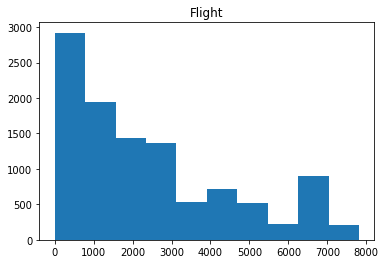

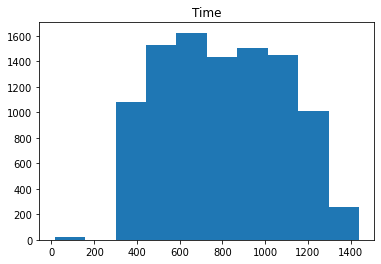

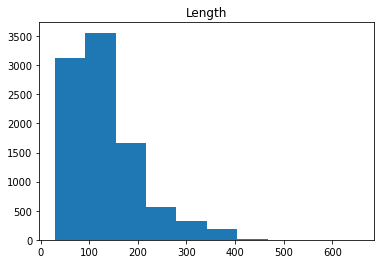

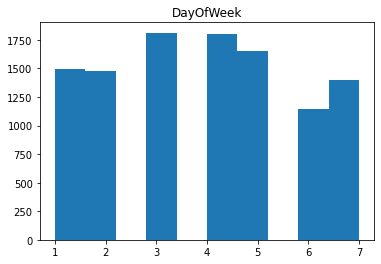

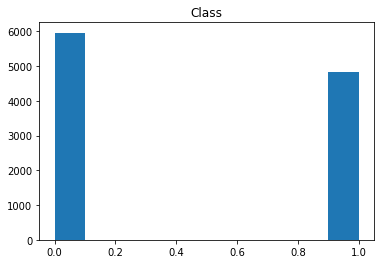

In [12]:
# Menampilkan visualisasi histogram
df_col = df.select_dtypes(exclude='object').columns.to_list()
for col in df_col:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

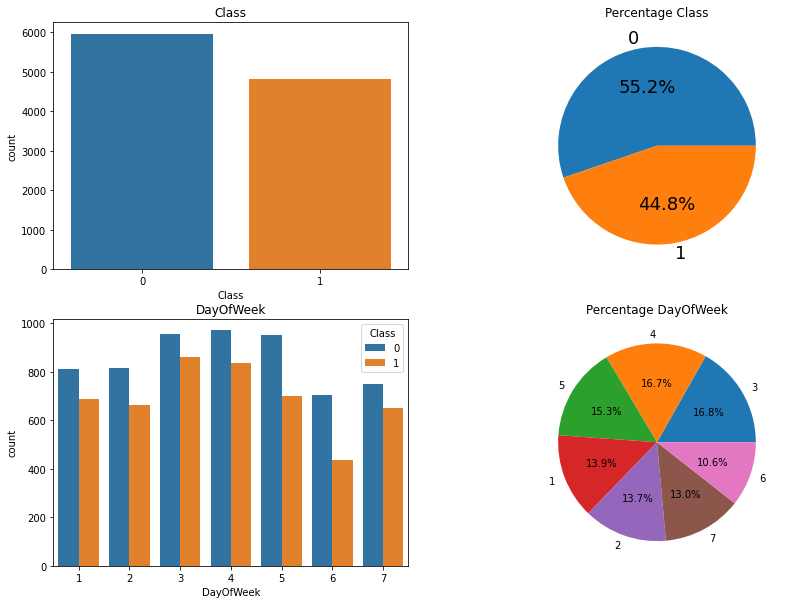

In [13]:
# Visualisasi pada kolom class dan DayOfWeek
fig, axes = plt.subplots(2,2, figsize=(14,10))
sns.countplot(x='Class', data = df, ax = axes[0][0])
axes[0][0].set_title('Class')

axes[0][1].set_title('Percentage Class')
axes[0][1].pie(df['Class'].value_counts(), labels=df['Class'].value_counts().index.to_list(), autopct='%1.1f%%', textprops={'fontsize': 18})

sns.countplot(x='DayOfWeek', data = df, ax = axes[1][0], hue='Class')
axes[1][0].set_title('DayOfWeek')

axes[1][1].set_title('Percentage DayOfWeek')
axes[1][1].pie(df['DayOfWeek'].value_counts(), labels=df['DayOfWeek'].value_counts().index.to_list(), autopct='%1.1f%%', textprops={'fontsize': 10})

plt.show()

Text(0.5, 1.0, 'Jumlah Penerbangan dalam 1 Minggu')

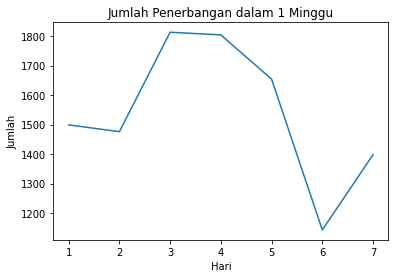

In [14]:
## Melihat Jumlah Penerbangan dalam 1 Minggu - Line Chart
df['DayOfWeek'].value_counts().sort_index().plot()
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.title('Jumlah Penerbangan dalam 1 Minggu')

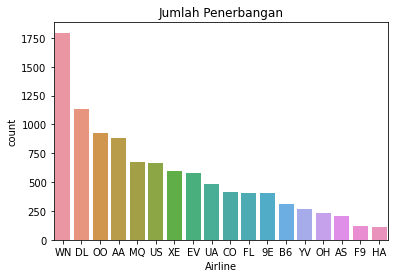

In [15]:
# Jumlah Penerbangan Masing - Masing Airline
airline_sort = df['Airline'].value_counts().sort_values(ascending=False).index.to_list()
sns.countplot(x='Airline', data = df, order=airline_sort)
plt.title("Jumlah Penerbangan")
plt.show()

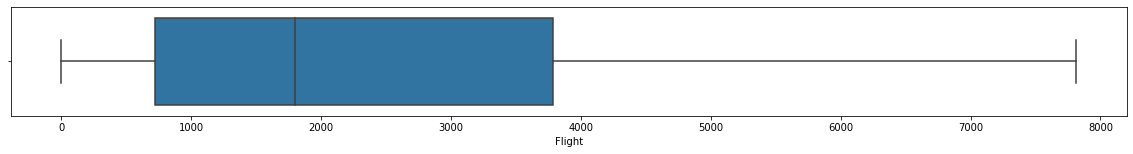

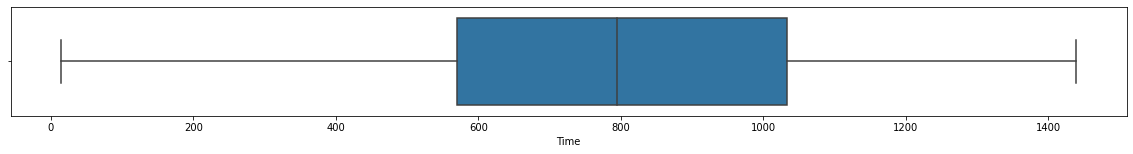

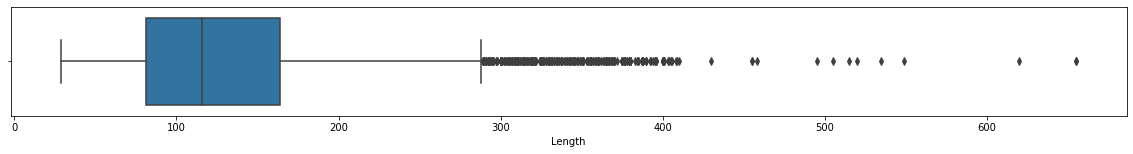

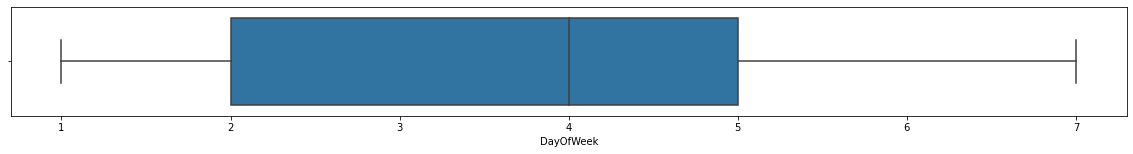

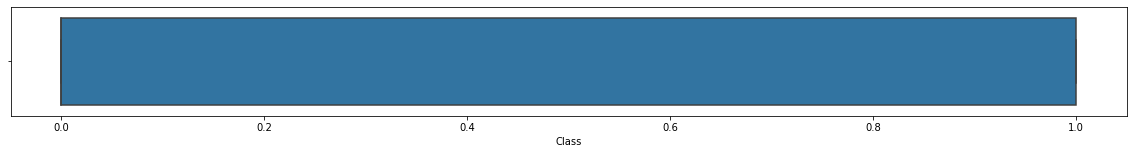

In [16]:
col_number = df.select_dtypes(exclude = 'object').columns.to_list()
for col in col_number:
    plt.figure(figsize=(20,2))
    sns.boxplot(x = col, data =df) 

<AxesSubplot:>

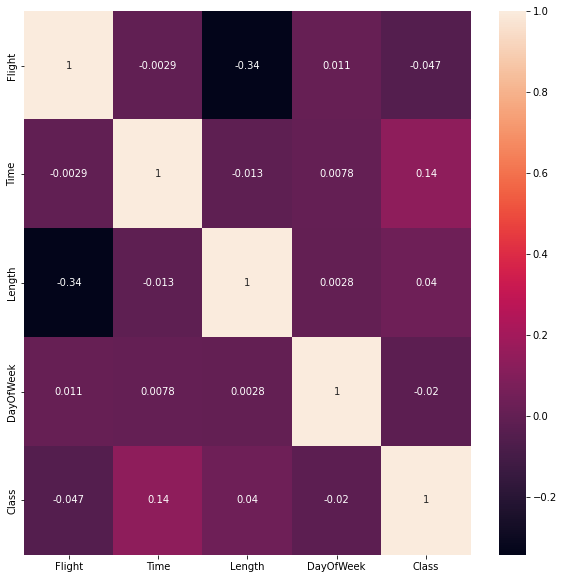

In [17]:
# Heat Map Coeff
df_number = df.select_dtypes(exclude = 'object')
plt.figure(figsize=(10,10))
sns.heatmap(df_number.corr(), annot=True)

# Memvalidasi Data

In [18]:
# Menampilkan tipe data tiap kolom / atribut / features
df.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [19]:
# Melihat nilai NaN pada setiap kolom
df.isnull().sum()

Flight            0
Time            873
Length         1343
Airline         582
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [20]:
# Melihat duplikasi pada DataFrame
df.duplicated().sum()

71

In [21]:
# Melihat nilai Unique pada kolom Kategori
df_cat = df.iloc[:, 3:7]
for col_cat in df_cat.columns.to_list():
    print(f'====={col_cat}=====\n')
    print(df[col_cat].unique())

=====Airline=====

[nan 'OO' 'DL' 'WN' 'CO' 'MQ' 'AS' 'EV' 'US' 'XE' 'UA' 'AA' 'FL' '9E' 'HA'
 'OH' 'YV' 'B6' 'F9']
=====AirportFrom=====

['IAH' 'DSM' 'SEA' 'SNA' 'MIA' 'BDL' 'PDX' 'AEX' 'DTW' 'CLT' 'FLL' 'DFW'
 'ORD' 'ATL' 'LIT' 'TUL' 'BNA' 'MSP' 'PHX' 'ONT' 'HNL' 'MDW' 'RNO' 'DEN'
 'MSY' 'CVG' 'SAN' 'LGA' 'LAX' 'SGF' 'ELP' 'SFO' 'OMA' 'MCO' 'HOU' 'RSW'
 'ASE' 'OAK' 'LAS' 'BOS' 'MOB' 'DCA' 'MEM' 'BWI' 'XNA' 'PBI' 'ANC' 'SBA'
 'TPA' 'AGS' 'PSP' 'CLE' 'TYS' 'OGG' 'SLC' 'DRO' 'SAV' 'STL' 'IAD' 'MLI'
 'MRY' 'BRO' 'SRQ' 'FAY' 'HSV' 'PHL' 'BUF' 'GSO' 'BFL' 'DAL' 'RIC' 'CAE'
 'SJC' 'RDU' 'EWR' 'LEX' 'BHM' 'ABQ' 'BTR' 'ATW' 'PVD' 'ROC' 'MAF' 'AUS'
 'MKE' 'MBS' 'ECP' 'IND' 'OTZ' 'BUR' 'BZN' 'EVV' 'JFK' 'MCI' 'TUS' 'ICT'
 'ORF' 'MOT' 'PSG' 'FLO' 'ABE' 'GJT' 'GRR' 'BOI' 'COS' 'GEG' 'GFK' 'VPS'
 'MFR' 'PIT' 'GNV' 'OTH' 'CHS' 'JAX' 'OKC' 'AVL' 'CMH' 'SJU' 'DAY' 'PNS'
 'FWA' 'KTN' 'ELM' 'LIH' 'LCH' 'SAT' 'HPN' 'GRB' 'LNK' 'ACV' 'BTV' 'FSD'
 'MGM' 'JAN' 'SMF' 'FNT' 'JNU' 'CAK' 'MSN' 'KOA' 'GPT' 'HT

# Menentukan Objek Data

# Membersihkan Data

In [22]:
# Melihat duplikasi pada DataFrame
print(f'Jumlah Duplikasi : {df.duplicated().sum()}')
# Drop duplikasi data
df = df.drop_duplicates().reset_index()

Jumlah Duplikasi : 71


In [23]:
df.drop(columns='index', axis = 1, inplace=True)
print(f'Jumlah Duplikasi : {df.duplicated().sum()}')

Jumlah Duplikasi : 0


In [24]:
# Menilhat missing value
df.isnull().sum()

Flight            0
Time            873
Length         1342
Airline         582
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [25]:
# Fill NaN pada kolom bernilai continues dengan Mean

mean_time = df['Time'].mean()
mean_length = df['Length'].mean()
print(f'Nilai Mean Time : {mean_time} \nNilai Mean Length : {mean_length}')
df['Time'].fillna(mean_time, inplace = True)
df['Length'].fillna(mean_length, inplace = True)


Nilai Mean Time : 803.299908564462 
Nilai Mean Length : 133.3044591423085


In [26]:
# Fill NaN pada kolom bernilai categories dengan Modus
mode_airline = df['Airline'].mode()
print(f'Modus pada kolom Airline : {mode_airline.values[0]}')
df['Airline'].fillna(mode_airline.values[0], inplace = True)

Modus pada kolom Airline : WN


In [27]:
# Menilhat missing value
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

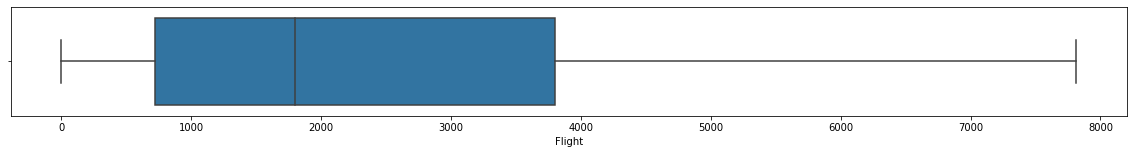

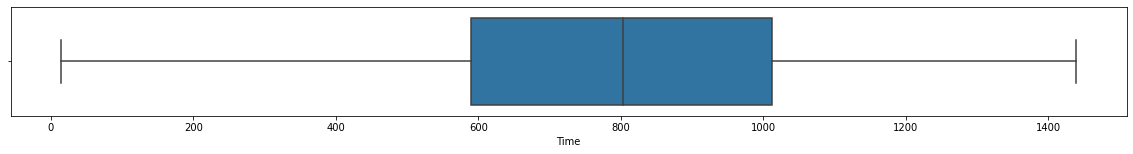

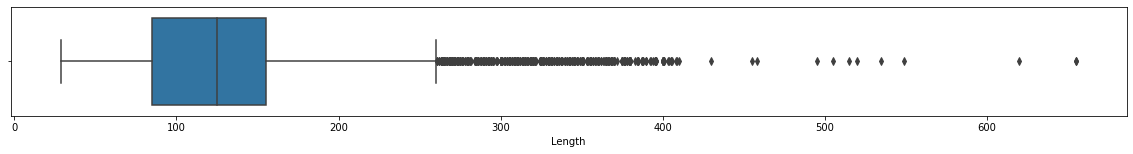

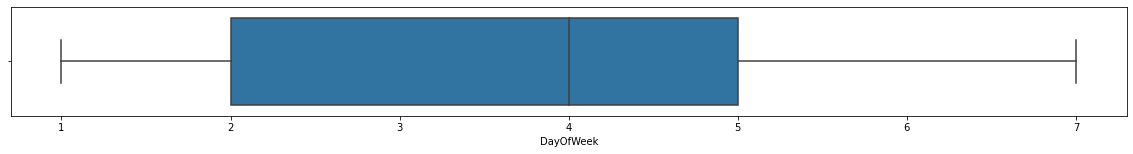

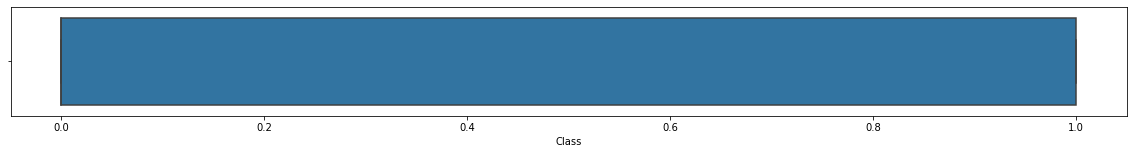

In [28]:
# Melihat Outlier
col_number = df.select_dtypes(exclude = 'object').columns.to_list()
for col in col_number:
    plt.figure(figsize=(20,2))
    sns.boxplot(x = col, data =df) 

In [29]:
# Handling Outlier Dengan Teknik Winsorize 
from scipy.stats.mstats import winsorize
df['Length'] = winsorize(df['Length'], limits=[0, 0.05])

<AxesSubplot:xlabel='Length'>

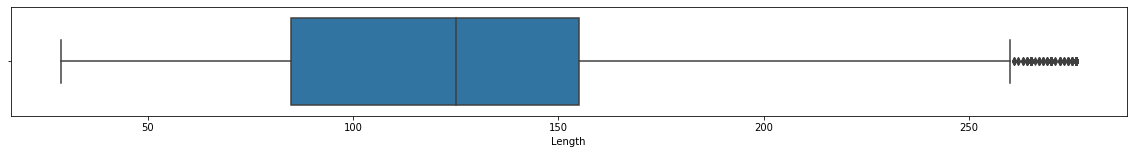

In [30]:
# Mencari Outliers - Boxplot
plt.figure(figsize=(20,2))
sns.boxplot(data=df, x=df['Length'])

In [31]:
col_cat

'DayOfWeek'

In [32]:
# Encoding Kolom Kategori
col_cat = df.iloc[:, 3:7].columns.to_list()
le = preprocessing.LabelEncoder()
df[col_cat] = df[col_cat].apply(le.fit_transform)

In [33]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,15,125,199,4,0
1,3045.0,365.0,66.0,12,76,170,1,0
2,1560.0,740.0,257.0,5,235,64,6,0
3,1156.0,595.0,235.0,15,245,162,6,1
4,1873.0,530.0,133.0,4,125,160,5,1


# Mengkonstruksi Data

In [34]:
# Scaling menggunakan Robust Scaling
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df.iloc[:, 0:3])
robust_df = pd.DataFrame(robust_df, columns = df.iloc[:, 0:3].columns)
robust_df.head()

,Flight,Time,Length
0,-0.481280,0.158057,0.785714
1,0.403963,-1.038625,-0.842857
2,-0.078454,-0.150000,1.885714
3,-0.209697,-0.493602,1.571429
4,0.023227,-0.647630,0.114286


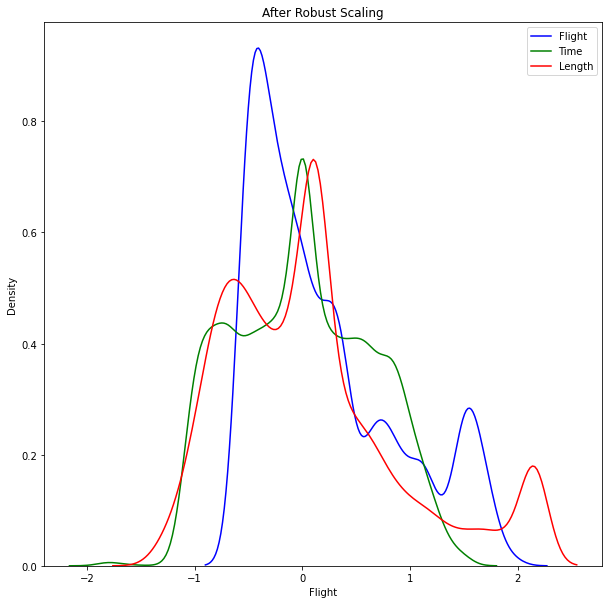

In [35]:
plt.figure(figsize=(10,10))
plt.title('After Robust Scaling')
sns.kdeplot(robust_df['Flight'], color='blue', label='Flight')
sns.kdeplot(robust_df['Time'], color='green', label='Time')
sns.kdeplot(robust_df['Length'], color='red', label='Length')
plt.legend()

In [36]:
df.iloc[:, 0:3] = robust_df
df

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,-0.481280,0.158057,0.785714,15,125,199,4,0
1,0.403963,-1.038625,-0.842857,12,76,170,1,0
2,-0.078454,-0.150000,1.885714,5,235,64,6,0
3,-0.209697,-0.493602,1.571429,15,245,162,6,1
4,0.023227,-0.647630,0.114286,4,125,160,5,1
...,...,...,...,...,...,...,...,...
10711,0.331195,-0.458057,-1.071429,10,72,244,1,0
10712,0.265248,0.084597,-0.100000,16,234,87,1,0
10713,0.055713,0.845261,-0.014286,5,11,169,1,0
10714,-0.413709,1.117773,-0.185714,14,203,215,3,0


# Menentukan Label

In [37]:
df['Class'].unique()

array([0, 1])

In [38]:
X = df.drop(columns = ['Class','Flight'])
y = df['Class']

# Membangun Model

In [39]:
X_train_linreg, X_test_linreg, y_train_linreg, y_test_linreg = train_test_split(X, y, test_size=0.2)
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X, y, test_size=0.2)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2)

In [40]:
lin_reg = LinearRegression()
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
knn = KNeighborsClassifier(n_neighbors= 3)

In [41]:
lin_reg.fit(X_train_linreg,y_train_linreg)
log_reg.fit(X_train_logreg,y_train_logreg)
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred_lin_reg = lin_reg.predict(X_test_linreg)
y_pred_log_reg = log_reg.predict(X_test_logreg)
y_pred_knn = knn.predict(X_test_knn)

# Evaluasi Hasil Model

In [74]:
y_pred_lin_reg = [1 if prob > 0.5 else 0 for prob in y_pred_lin_reg]
y_pred_log_reg = [1 if prob > 0.5 else 0 for prob in y_pred_log_reg]

In [81]:
akurasi_train_lin_reg = lin_reg.score(X_train_linreg, y_train_linreg)
akurasi_train_log_reg = log_reg.score(X_train_logreg, y_train_logreg)
akurasi_train_knn = knn.score(X_train_knn, y_train_knn)

akurasi_test_lin_reg = accuracy_score(y_test_linreg, y_pred_lin_reg)
akurasi_test_log_reg = accuracy_score(y_test_logreg, y_pred_log_reg)
akurasi_test_knn = accuracy_score(y_test_knn, y_pred_knn)

In [82]:
akurasi = pd.DataFrame({'Algoritma' : ['Linear Regression', 'Logistic Regression', 'KNN'],
                        'Akurasi Training' :[akurasi_train_lin_reg, akurasi_train_log_reg, akurasi_train_knn],
                        'Akurasi Testing' :[akurasi_test_lin_reg, akurasi_test_log_reg, akurasi_test_knn]})

In [83]:
akurasi

,Algoritma,Akurasi Training,Akurasi Testing
0,Linear Regression,0.027398,0.567164
1,Logistic Regression,0.570345,0.581157
2,KNN,0.770065,0.568563


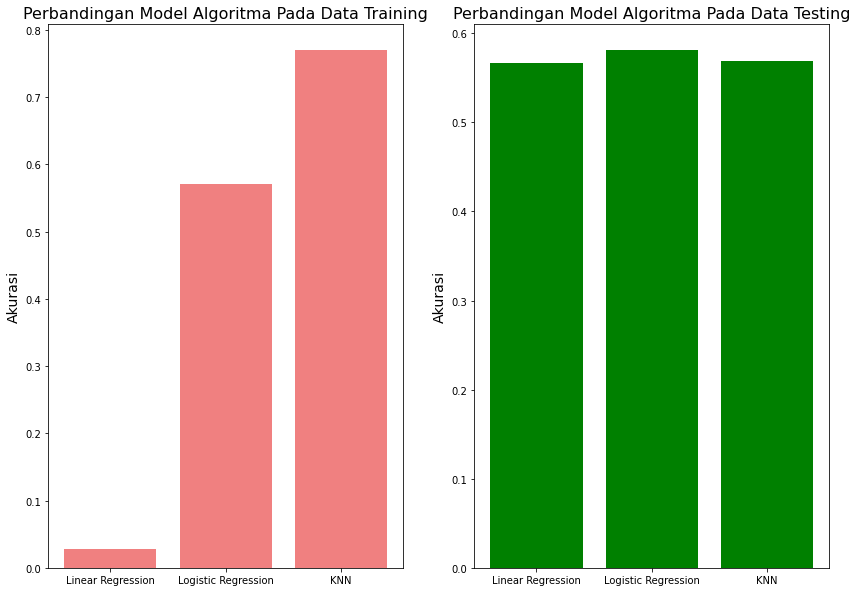

In [89]:
fig, axes = plt.subplots(1,2, figsize=(14,10))

axes[0].bar(akurasi['Algoritma'], akurasi['Akurasi Training'] , color='lightcoral')

axes[0].set_title('Perbandingan Model Algoritma Pada Data Training', size=16)
axes[0].set_ylabel('Akurasi', size=14)

axes[1].bar(akurasi['Algoritma'], akurasi['Akurasi Testing'] , color='green')

axes[1].set_title('Perbandingan Model Algoritma Pada Data Testing', size=16)
axes[1].set_ylabel('Akurasi', size=14)


plt.show()